<a href="https://colab.research.google.com/github/TranNgocXuanThanh/-recognition-of-all-members-of-class-from-face-images-you-collected-/blob/main/recognition_of_all_members_of_class_from_face_images_(you_collected).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
from os import listdir
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Activation, Dropout
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt

# specify the folder here
folder = '/content/drive/MyDrive/lophoc/'

photos, labels = list(), list()

photos, labels = list(), list()

for file in listdir(folder):
    output = None
    if file.startswith('HUYNHMINHTRANG'):
        output = 0
    if file.startswith('NGUYENTHIHUYENTRANG'):
        output = 1
    if file.startswith('TRANNGOCXUANTHANH'):
        output = 2
    if file.startswith('NGOMINHANH'):
        output = 3
    if file.startswith('DUONGTRIDUC'):
        output = 4
    if file.startswith('PHAMTUANKIET'):
        output = 5
    if output is not None:
      photo = load_img(folder + file, target_size=(200, 200, 3))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)
photos = np.array(photos)
labels = np.array(labels)

# Normalize images
photos= photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,18)

# Save photos and labels to disk
save('/content/drive/MyDrive/lophoc', photos)
save('/content/drive/MyDrive/lophoc', labels)

# Define the model
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64, epochs=20, verbose=1)

model.evaluate(photos,labels)

Epoch 1/20
1/1 [==============================] - 9s 9s/step - loss: 2.9433 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 409ms/step - loss: 7.8194 - accuracy: 0.4000
Epoch 3/20
1/1 [==============================] - 0s 405ms/step - loss: 6.4351 - accuracy: 0.2200
Epoch 4/20
1/1 [==============================] - 0s 407ms/step - loss: 2.6223 - accuracy: 0.2600
Epoch 5/20
1/1 [==============================] - 0s 401ms/step - loss: 2.1989 - accuracy: 0.3400
Epoch 6/20
1/1 [==============================] - 0s 402ms/step - loss: 2.7013 - accuracy: 0.3200
Epoch 7/20
1/1 [==============================] - 0s 402ms/step - loss: 1.8905 - accuracy: 0.3000
Epoch 8/20
1/1 [==============================] - 0s 392ms/step - loss: 1.9993 - accuracy: 0.3000
Epoch 9/20
1/1 [==============================] - 0s 395ms/step - loss: 1.9603 - accuracy: 0.3600
Epoch 10/20
1/1 [==============================] - 0s 393ms/step - loss: 1.8388 - accuracy: 0.3000
Epoch 11/20
1/1 [=

[0.22317130863666534, 0.9599999785423279]

In [37]:
model.save('lophoc.h5')

In [38]:
classes = ['DUONGTRIDUC','NGOMINHANH','TRANNGOCXUANTHANH','NGUYENTHIHUYENTRANG','HUYNHMINHTRANG','PHAMTUANKIET']

1/1 [==============================] - 0s 24ms/step
[[3.2696053e-02 6.6926104e-01 5.1489417e-02 1.6425835e-01 1.5495093e-02
  1.4769320e-03 1.4825683e-03 1.2735464e-02 5.6934827e-03 7.9016223e-05
  6.3012313e-04 4.6789926e-04 1.0433032e-03 3.8103797e-02 1.8851756e-03
  3.2809214e-04 1.3109599e-03 1.5631679e-03]]


'NGOMINHANH'

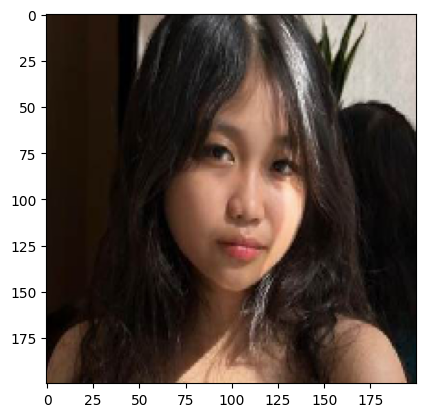

In [51]:
img = load_img('/content/drive/MyDrive/lophoc/NGOMINHANH2.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]